# Goal of Project

##### The goal of this project is to analyze a dataset containing information regarding the different types of crimes, or "incidents", that occured in one of the numerous neighborhoods in Los Angeles (LA) from 2020 to present day (2024). I will breakdown some statistical insights as well as provide visualizations to help illistrate the findings.

In [70]:
# I will import pandas first
import pandas as pd

In [71]:
# I will use matplotlib to generate visuals for this project
import matplotlib.pyplot as plt

In [5]:
csv = pd.read_csv('/Users/abelfanta/Downloads/Crime_Data_from_2020_to_Present-2.csv')

In [6]:
df = pd.DataFrame(csv)

##### First, I wanted to get a good look as to what the data looks like raw.

In [7]:
df.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,190326475,03/01/2020 12:00:00 AM,03/01/2020 12:00:00 AM,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,...,AA,Adult Arrest,510.0,998.0,NaN,NaN,1900 S LONGWOOD AV,NaN,34.0375,-118.3506
1,200106753,02/09/2020 12:00:00 AM,02/08/2020 12:00:00 AM,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,...,IC,Invest Cont,330.0,998.0,NaN,NaN,1000 S FLOWER ST,NaN,34.0444,-118.2628
2,200320258,11/11/2020 12:00:00 AM,11/04/2020 12:00:00 AM,1700,3,Southwest,356,1,480,BIKE - STOLEN,...,IC,Invest Cont,480.0,NaN,NaN,NaN,1400 W 37TH ST,NaN,34.0210,-118.3002
3,200907217,05/10/2023 12:00:00 AM,03/10/2020 12:00:00 AM,2037,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),...,IC,Invest Cont,343.0,NaN,NaN,NaN,14000 RIVERSIDE DR,NaN,34.1576,-118.4387
4,220614831,08/18/2022 12:00:00 AM,08/17/2020 12:00:00 AM,1200,6,Hollywood,666,2,354,THEFT OF IDENTITY,...,IC,Invest Cont,354.0,NaN,NaN,NaN,1900 TRANSIENT,NaN,34.0944,-118.3277


##### There seems to be a lot of data here. There are over 900,000 rows of data, along with 28 columns to review!

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 932140 entries, 0 to 932139
Data columns (total 28 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DR_NO           932140 non-null  int64  
 1   Date Rptd       932140 non-null  object 
 2   DATE OCC        932140 non-null  object 
 3   TIME OCC        932140 non-null  int64  
 4   AREA            932140 non-null  int64  
 5   AREA NAME       932140 non-null  object 
 6   Rpt Dist No     932140 non-null  int64  
 7   Part 1-2        932140 non-null  int64  
 8   Crm Cd          932140 non-null  int64  
 9   Crm Cd Desc     932140 non-null  object 
 10  Mocodes         801530 non-null  object 
 11  Vict Age        932140 non-null  int64  
 12  Vict Sex        807934 non-null  object 
 13  Vict Descent    807924 non-null  object 
 14  Premis Cd       932130 non-null  float64
 15  Premis Desc     931578 non-null  object 
 16  Weapon Used Cd  321339 non-null  float64
 17  Weapon Des

##### In addition, it seems that the data values range from simple text to floating objects and integers. What's more conecerning is that we have some missing values in this data set. We will need to be careful when analyzing some of these columns.

##### The first thing we should understand is what area in LA experienced the hightest record of incidents reported. This will establish some basic understanding of the data set as we work to formulate a data narrative.

In [80]:
# I will create a variable to store what will eventaully be a 
# new dataframe only containing the area name's and the amount of crimes in each

# I started with making a pandas series object and used the value_counts method to extract the data
# for each instance of a reported crime and the neighborhood that it was reported in. 
# Thankfully the columns AREA NAME and Crm Cd Desc are not missing any data based on the info() method

top_5_values = df[['AREA NAME']].value_counts()

In [82]:
# I modified the series by using the reset_index method to use a auto-incrementing numerical format
# instead of using the values in the AREA NAME column as a index
top_5_values_df = top_5_values.to_frame().reset_index()

In [83]:
top_5_values_df

,AREA NAME,count
0,Central,63133
1,77th Street,58353
2,Pacific,54446
3,Southwest,52581
4,Hollywood,49080
5,Olympic,47069
6,Southeast,47068
7,N Hollywood,46993
8,Newton,46096
9,Wilshire,44753


#### Excellent! We are now able to indicate which areas experience the most reported crimes.

##### Let's create a quick bar chart to visualize some of this data. Let's start with the top five neighborhooods.

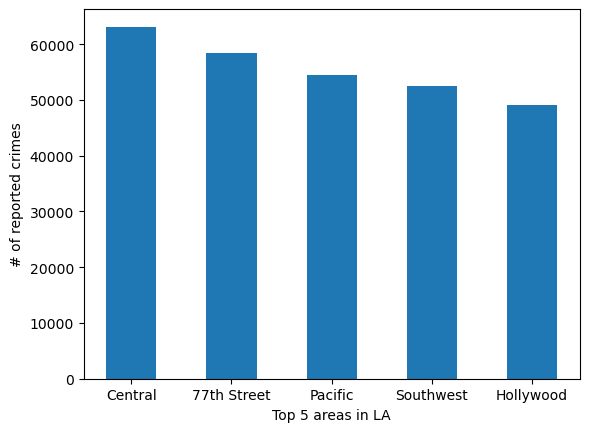

In [85]:
plt.bar(top_5_values_df['AREA NAME'].iloc[:5],top_5_values_df['count'].iloc[:5], 0.5)


plt.xlabel('Top 5 areas in LA')
plt.ylabel('# of reported crimes')
plt.show()

#### Finding the counts of data is a great way to get some quick insights as to what the data is trying to tell us. Let's learn more about what is going on in the 'Central' neighborhood.

In [87]:
# I will use the groupby method to truncate data under the AREA NAME column

# This will allow us to perform some aggergation with all the data under that column now
areas = df.groupby('AREA NAME')

In [89]:
# Let's extract all the rows with 'Central' listed as the neighborhood using the get_group method
areas.get_group('Central')

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
1,200106753,02/09/2020 12:00:00 AM,02/08/2020 12:00:00 AM,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,...,IC,Invest Cont,330.0,998.0,NaN,NaN,1000 S FLOWER ST,NaN,34.0444,-118.2628
6,230110144,04/04/2023 12:00:00 AM,07/03/2020 12:00:00 AM,900,1,Central,182,2,354,THEFT OF IDENTITY,...,IC,Invest Cont,354.0,NaN,NaN,NaN,1100 S GRAND AV,NaN,34.0415,-118.2620
60,220119956,09/06/2022 12:00:00 AM,07/01/2020 12:00:00 AM,1130,1,Central,162,2,354,THEFT OF IDENTITY,...,IC,Invest Cont,354.0,NaN,NaN,NaN,800 S HOPE ST,NaN,34.0466,-118.2590
62,220104934,01/17/2022 12:00:00 AM,12/20/2020 12:00:00 AM,1730,1,Central,158,1,341,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",...,IC,Invest Cont,341.0,NaN,NaN,NaN,6TH ST,GLADYS AV,34.0403,-118.2421
117,230118041,08/16/2023 12:00:00 AM,08/27/2020 12:00:00 AM,2100,1,Central,132,1,236,INTIMATE PARTNER - AGGRAVATED ASSAULT,...,AO,Adult Other,236.0,NaN,NaN,NaN,800 W 1ST ST,NaN,34.0570,-118.2508
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
932032,240105721,01/25/2024 12:00:00 AM,01/24/2024 12:00:00 AM,2352,1,Central,182,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,IC,Invest Cont,745.0,NaN,NaN,NaN,1000 S HILL ST,NaN,34.0420,-118.2625
932047,240105173,01/17/2024 12:00:00 AM,01/17/2024 12:00:00 AM,1820,1,Central,153,2,888,TRESPASSING,...,IC,Invest Cont,888.0,NaN,NaN,NaN,500 S HILL ST,NaN,34.0488,-118.2518
932065,240107661,02/21/2024 12:00:00 AM,02/21/2024 12:00:00 AM,1658,1,Central,162,1,442,SHOPLIFTING - PETTY THEFT ($950 & UNDER),...,IC,Invest Cont,442.0,NaN,NaN,NaN,700 W 7TH ST,NaN,34.0480,-118.2577
932104,240107602,02/20/2024 12:00:00 AM,02/20/2024 12:00:00 AM,1850,1,Central,182,1,330,BURGLARY FROM VEHICLE,...,IC,Invest Cont,330.0,NaN,NaN,NaN,12TH ST,OLIVE,34.0394,-118.2623


##### Let's see if we can find the frequency of the incidents reported in Central. We can do a simple calculation to find the percentage of the incidents

In [90]:
# There were 63,133 crimed reported in Centeral LA alone from 2020 to 2024
# Divide that number by the total amount of reported incidents (932,140) then multiply
# that by 100 and we will get the total percentage amount

percentage_of_Central = (63133/932140)*100
percentage_of_Central

6.772909648765207

#### It appears of the 900,000+ reported incidents in LA approximately 6.77% of them came from Central LA 

#### Finding the frequency of an amount is also a great insight to use to further craft a more compelling narrative. It provides us a better understanding just how much of a significant portion of the data belongs to Central compared to the rest of the whole. This will make more sense in a pie chart.

#### Let's get a better understanding of the types of crimes being reported in Central LA

In [95]:
# Let's get another quick look at what the dataset looks like to see what we need to examine further
areas.get_group('Central')

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
1,200106753,02/09/2020 12:00:00 AM,02/08/2020 12:00:00 AM,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,...,IC,Invest Cont,330.0,998.0,NaN,NaN,1000 S FLOWER ST,NaN,34.0444,-118.2628
6,230110144,04/04/2023 12:00:00 AM,07/03/2020 12:00:00 AM,900,1,Central,182,2,354,THEFT OF IDENTITY,...,IC,Invest Cont,354.0,NaN,NaN,NaN,1100 S GRAND AV,NaN,34.0415,-118.2620
60,220119956,09/06/2022 12:00:00 AM,07/01/2020 12:00:00 AM,1130,1,Central,162,2,354,THEFT OF IDENTITY,...,IC,Invest Cont,354.0,NaN,NaN,NaN,800 S HOPE ST,NaN,34.0466,-118.2590
62,220104934,01/17/2022 12:00:00 AM,12/20/2020 12:00:00 AM,1730,1,Central,158,1,341,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",...,IC,Invest Cont,341.0,NaN,NaN,NaN,6TH ST,GLADYS AV,34.0403,-118.2421
117,230118041,08/16/2023 12:00:00 AM,08/27/2020 12:00:00 AM,2100,1,Central,132,1,236,INTIMATE PARTNER - AGGRAVATED ASSAULT,...,AO,Adult Other,236.0,NaN,NaN,NaN,800 W 1ST ST,NaN,34.0570,-118.2508
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
932032,240105721,01/25/2024 12:00:00 AM,01/24/2024 12:00:00 AM,2352,1,Central,182,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,IC,Invest Cont,745.0,NaN,NaN,NaN,1000 S HILL ST,NaN,34.0420,-118.2625
932047,240105173,01/17/2024 12:00:00 AM,01/17/2024 12:00:00 AM,1820,1,Central,153,2,888,TRESPASSING,...,IC,Invest Cont,888.0,NaN,NaN,NaN,500 S HILL ST,NaN,34.0488,-118.2518
932065,240107661,02/21/2024 12:00:00 AM,02/21/2024 12:00:00 AM,1658,1,Central,162,1,442,SHOPLIFTING - PETTY THEFT ($950 & UNDER),...,IC,Invest Cont,442.0,NaN,NaN,NaN,700 W 7TH ST,NaN,34.0480,-118.2577
932104,240107602,02/20/2024 12:00:00 AM,02/20/2024 12:00:00 AM,1850,1,Central,182,1,330,BURGLARY FROM VEHICLE,...,IC,Invest Cont,330.0,NaN,NaN,NaN,12TH ST,OLIVE,34.0394,-118.2623


In [98]:
# Let's save this in a new variable for faster retrival
Central = areas.get_group('Central')

In [96]:
# If we want to understand more about the crimes occurring in Central we should use the 'Crm Cd Desc'
# column to see what are the types of crimes being reported

# Let's index the column and apply the value_counts method to get a snapshot of the 
# counts of each crime

Central['Crm Cd Desc'].value_counts()

Crm Cd Desc
BURGLARY FROM VEHICLE                                       8644
BATTERY - SIMPLE ASSAULT                                    6739
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)     4381
VEHICLE - STOLEN                                            4189
ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT              4028
                                                            ... 
PURSE SNATCHING - ATTEMPT                                      1
THEFT, COIN MACHINE - ATTEMPT                                  1
DISHONEST EMPLOYEE - GRAND THEFT                               1
BIGAMY                                                         1
REPLICA FIREARMS(SALE,DISPLAY,MANUFACTURE OR DISTRIBUTE)       1
Name: count, Length: 118, dtype: int64

#### It seems alot of people are having their cars broken into along with getting assulted and having their property vandilized.

In [99]:
Central_crimes = Central['Crm Cd Desc'].value_counts().to_frame().reset_index()

In [100]:
Central_crimes

,Crm Cd Desc,count
0,BURGLARY FROM VEHICLE,8644
1,BATTERY - SIMPLE ASSAULT,6739
2,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",4381
3,VEHICLE - STOLEN,4189
4,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",4028
...,...,...
113,PURSE SNATCHING - ATTEMPT,1
114,"THEFT, COIN MACHINE - ATTEMPT",1
115,DISHONEST EMPLOYEE - GRAND THEFT,1
116,BIGAMY,1


In [106]:
Central_crimes.plot.barh(x=Central_crimes['Crm Cd Desc'].iloc[:10],y=Central_crimes['count'].iloc[:10])

KeyError: "None of [Index(['BURGLARY FROM VEHICLE', 'BATTERY - SIMPLE ASSAULT',\n       'VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)',\n       'VEHICLE - STOLEN', 'ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT',\n       'THEFT PLAIN - PETTY ($950 & UNDER)',\n       'THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD', 'ROBBERY',\n       'BURGLARY', 'INTIMATE PARTNER - SIMPLE ASSAULT'],\n      dtype='object')] are in the [columns]"

In [111]:
import numpy as np

In [112]:
#plt.imshow(Central_crimes['count'].iloc[:10].iloc[:10],cmap='viridis',aspect='auto')
#lt.colorbar()

data = np.array([Central_crimes['count'].iloc[:10]])

([<matplotlib.axis.XTick at 0x14caabf70>,
 [Text(0, 0, 'BURGLARY FROM VEHICLE'),
  Text(1, 0, 'BATTERY - SIMPLE ASSAULT'),
  Text(2, 0, 'VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)'),
  Text(3, 0, 'VEHICLE - STOLEN'),
  Text(4, 0, 'ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT'),
  Text(5, 0, 'THEFT PLAIN - PETTY ($950 & UNDER)'),
  Text(6, 0, 'THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD'),
  Text(7, 0, 'ROBBERY'),
  Text(8, 0, 'BURGLARY'),
  Text(9, 0, 'INTIMATE PARTNER - SIMPLE ASSAULT')])

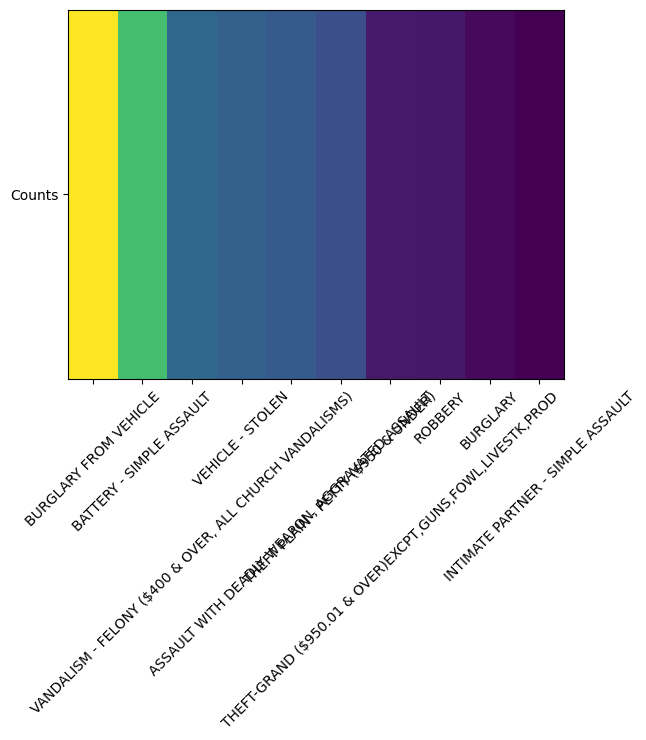

In [115]:
plt.imshow(data,cmap='viridis',aspect='auto')
plt.yticks(ticks=[0],labels=['Counts'])
plt.xticks(ticks=np.arange(len(Central_crimes['Crm Cd Desc'].iloc[:10])),labels=Central_crimes['Crm Cd Desc'].iloc[:10],rotation=45)

In [128]:
Central.describe(include=['int64'])

,DR_NO,TIME OCC,AREA,Rpt Dist No,Part 1-2,Crm Cd,Vict Age
count,6.313300e+04,63133.000000,63133.0,63133.000000,63133.000000,63133.000000,63133.000000
mean,2.184847e+08,1338.330366,1.0,153.006272,1.379611,490.207752,29.580505
std,1.192088e+07,662.362997,0.0,23.515543,0.485294,207.396344,20.044511
min,1.901011e+08,1.000000,1.0,101.000000,1.000000,110.000000,-4.000000
25%,2.101108e+08,900.000000,1.0,138.000000,1.000000,330.000000,20.000000
50%,2.201135e+08,1425.000000,1.0,156.000000,1.000000,440.000000,30.000000
75%,2.301109e+08,1900.000000,1.0,166.000000,2.000000,626.000000,43.000000
max,2.401103e+08,2359.000000,1.0,195.000000,2.000000,956.000000,99.000000


#### Seem's the average age of a victim of the Central crimes was about 29 and a half.